# Word Embeddings with Word2Vec
Being able to represent a word as a series of numerical values is essential to the large language modeling done using the transformer architecture. Word2Vec makes this possible extracting the word embeddings creating during the skip-gram or continuous bag-of-words(CBOW) process. More info can be found <a href='https://www.youtube.com/watch?v=gQddtTdmG_8' target="_blank">here</a>.
<br>
Adapted from <a href='https://www.kaggle.com/code/jihyeseo/word2vec-gensim-play-look-for-similar-words' target="_blank">Kaggle</a> and <a href='https://towardsdatascience.com/understanding-word2vec-embedding-in-practice-3e9b8985953' target="_blank">TowardsDataScience</a>. <br> Written By: Da'Vel Johnson

In [1]:
# Importing the Word2Vec module
import gensim.downloader as api
from gensim.models import Word2Vec

## Training the Word2Vec model

In [2]:
# Download a text corpus for training Word2Vec
corpus = api.load('text8')

# Train a Word2Vec model on the text corpus
#sg=0: Uses the CBOW architecture. sg=1: Uses the Skip-gram architecture.
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, workers=4, epochs=5, sg=0)

# Save the trained model to a file
model.save("word2vec_model")

# Load the saved model
loaded_model = Word2Vec.load("word2vec_model")

### How many words are in the corpus?

In [3]:
# Flatten the list of lists into a single list of words
all_words = [word for sentence in corpus for word in sentence]

# Create a set of unique words
unique_words = set(all_words)

# Count the number of unique words
num_unique_words = len(unique_words)

print(f"Number of unique words in the text8 corpus: {num_unique_words}")

Number of unique words in the text8 corpus: 253854


## Using the trained model

In [4]:
# Find the vector representation of a word
word1='computer'
word2='laptop'
word_vector = loaded_model.wv[word1]

# Find the most similar words to a given word
similar_words = loaded_model.wv.most_similar(word1, topn=10)

# Find the similarity between two words
similarity = loaded_model.wv.similarity(word1, word2)

print("Vector representation of the word :", word1)
print(word_vector)

print("\nTop 10 most similar words to :", word1)
for word, score in similar_words:
    print(f"{word}: {score}")

print("\nSimilarity between ", word1 + " and " + word2)
print(similarity)

Vector representation of the word : computer
[-0.1696152   0.03977273 -1.6142509   0.80795836 -1.3488977  -1.9992895
  0.07614967  0.39692298 -0.8842152   0.5970802   1.4464766  -4.3852897
  0.46164048 -2.3159826  -3.4858932   0.70859474  0.76130426 -1.1508452
  1.1162137   0.03445475 -0.8702186  -1.4601638  -0.74114686 -1.1341766
 -0.01858072  0.09850959  1.3609     -0.36663023 -0.19098063  0.6380601
  1.1645826   1.7270626   0.8823621   1.7756115  -1.0360365   2.3361828
  0.86468875 -0.246082    0.30048078 -0.4279755  -2.04644    -1.1439999
  2.0315814   0.52497965  2.3341107  -0.18531676 -0.18521233  2.4032943
 -0.730989   -1.8627257   1.4713875   0.80163485  1.5171877  -3.3317647
 -1.6274753   0.32910073 -1.0830698  -2.228089   -1.2469157  -1.2434509
 -2.246893   -0.6814539   3.032343    1.0753156   0.1537342   0.8198287
  1.9957052   0.87849724  1.2810159   1.598118   -1.9588158   1.3699526
 -0.9967758   1.1140213   0.3165327   0.7611594   1.622918    1.1761311
 -3.5265074  -3.823

### Demonstrating word similarity
A classic example is to show that the word most similar to 'woman' + 'king' - 'man' is 'queen'. This is intuitive linguistically, but it's interesting to see this emerge mathematically. 

In [5]:
#Woman + King - Man = Queen
loaded_model.wv.most_similar(positive=['woman','king'], negative=['man'], topn = 10)

[('queen', 0.6963896751403809),
 ('prince', 0.6523086428642273),
 ('throne', 0.6451753377914429),
 ('empress', 0.6381632685661316),
 ('princess', 0.6225873231887817),
 ('emperor', 0.6196994781494141),
 ('regent', 0.6025001406669617),
 ('daughter', 0.597307562828064),
 ('mary', 0.5865886211395264),
 ('son', 0.5853062272071838)]

#### Playing with more word similarity

In [6]:
word1='robot'
word2='human'

In [7]:
result = loaded_model.wv.most_similar(positive=[word1, word2], topn=10)
print("Word analogy result: ", word1 + " plus " + word2 + " = " + result[0][0])

Word analogy result:  robot plus human = sentient


In [8]:
print("\nTop 10 most similar words to ", word1 + " and " + word2)
for word, score in result:
    print(f"{word}: {score}")


Top 10 most similar words to  robot and human
sentient: 0.7057055830955505
humanoid: 0.6676562428474426
mutant: 0.6371280550956726
alien: 0.6275253295898438
animal: 0.6161515712738037
robots: 0.5867959260940552
robotic: 0.5852395296096802
humans: 0.5788995623588562
supernatural: 0.5704163312911987
beings: 0.5629681944847107


Sometimes you arrive at non intuative results.

In [9]:
result = loaded_model.wv.most_similar(positive=[word1], negative=[word2], topn=10)
print("Word analogy result: ", word1 + " minus " + word2 + "= " + result[0][0])
print("\nTop 10 most similar words to ", word1 + " minus " + word2)
for word, score in result:
    print(f"{word}: {score}")

Word analogy result:  robot minus human= icarus

Top 10 most similar words to  robot minus human
icarus: 0.5767585039138794
wee: 0.5725619196891785
circus: 0.5677955150604248
gumby: 0.5618346333503723
boss: 0.5595255494117737
toting: 0.5552021861076355
kid: 0.5513733625411987
fawlty: 0.5473917126655579
slayer: 0.5422278046607971
hi: 0.5376124382019043


In [10]:
result = loaded_model.wv.most_similar(positive=[word1], topn=10)
print("Word analogy result: ", result[0][0])
print("\nTop 10 most similar words to your query:")
for word, score in result:
    print(f"{word}: {score}")

Word analogy result:  cyborg

Top 10 most similar words to your query:
cyborg: 0.7102828621864319
monster: 0.7012732028961182
killer: 0.6965927481651306
dalek: 0.6858187913894653
humanoid: 0.6793836951255798
wizard: 0.6763895153999329
robotic: 0.6740067601203918
rogue: 0.6690255403518677
vampire: 0.6664007306098938
superhero: 0.6518058776855469


### Opposite words vectorially
Finding opposite words has a different meaning with word embeddings. It means going in the opposite direction in vector space.

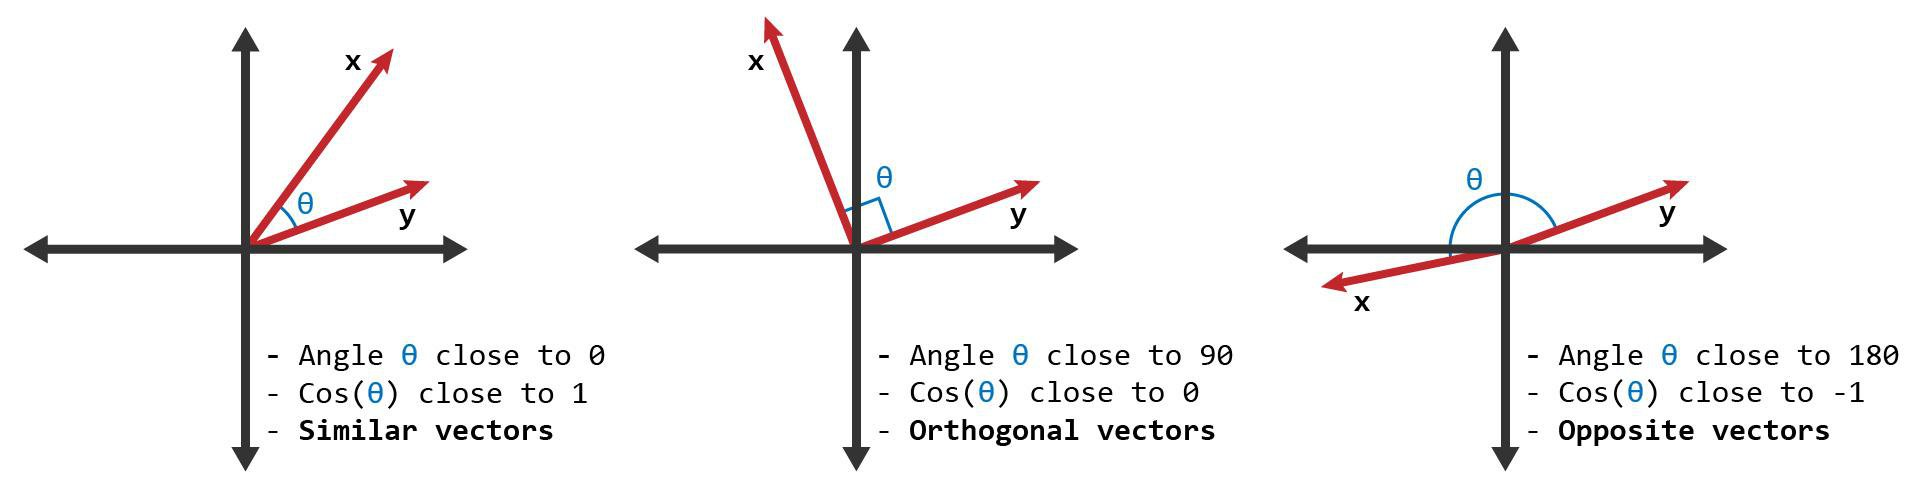

In [11]:
def find_opposite_word(word, model, top_n=10):
    # Get the word vector for the given word
    word_vector = model.wv[word]
    
    # Negate the word vector
    opposite_vector = -word_vector
    
    # Find the most similar words to the opposite vector
    opposite_words = model.wv.similar_by_vector(opposite_vector)

    return opposite_words

word = 'up'
opposite_words = find_opposite_word(word, loaded_model)

print(f"Opposite words for '{word}':")
for w, similarity in opposite_words:
    print(f"{w} (similarity: {similarity})")

Opposite words for 'up':
landa (similarity: 0.32932358980178833)
carolus (similarity: 0.3000851273536682)
ganshof (similarity: 0.299647718667984)
faust (similarity: 0.2943476736545563)
lucis (similarity: 0.2943273186683655)
ren (similarity: 0.29378005862236023)
ayurveda (similarity: 0.292289137840271)
founder (similarity: 0.28902316093444824)
chomsky (similarity: 0.28655877709388733)
de (similarity: 0.2844894826412201)


As a result, the outcomes nonsensical. <br>
Finding antonyms requires an understanding and encoding of context that Word2Vec is not designed to do. 

### Visualize Word Embeddings
Since words are being represented as vectors, this means they can be plotted using a dimension reduction algorithm called t-distributed Stochastic Neighbor Embedding (<a href='https://towardsdatascience.com/what-why-and-how-of-t-sne-1f78d13e224d' target="_blank">TSNE</a>)

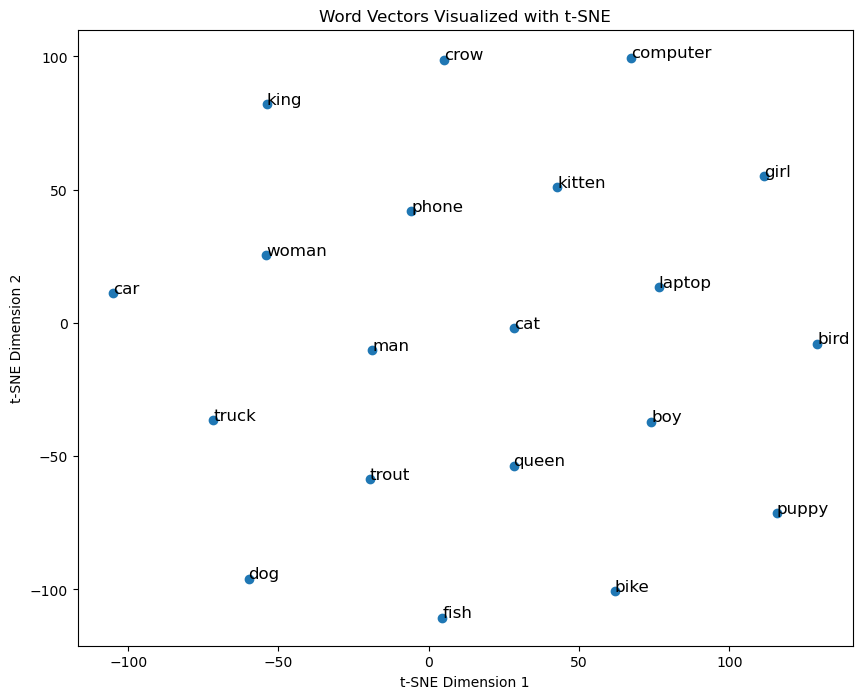

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Select a set of words to visualize
words_to_visualize = ['king', 'queen', 'man', 'woman', 'trout', 'computer','phone', 'boy','girl', 'kitten','laptop', 'car', 'truck', 'bike', 'dog','puppy', 'cat', 'fish', 'bird', 'crow']

# Get the word vectors for the selected words
word_vectors = np.array([loaded_model.wv[word] for word in words_to_visualize])

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=len(words_to_visualize) - 1)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a scatter plot of the 2D word vectors
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Add labels to the points
for i, word in enumerate(words_to_visualize):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word Vectors Visualized with t-SNE')
plt.show()

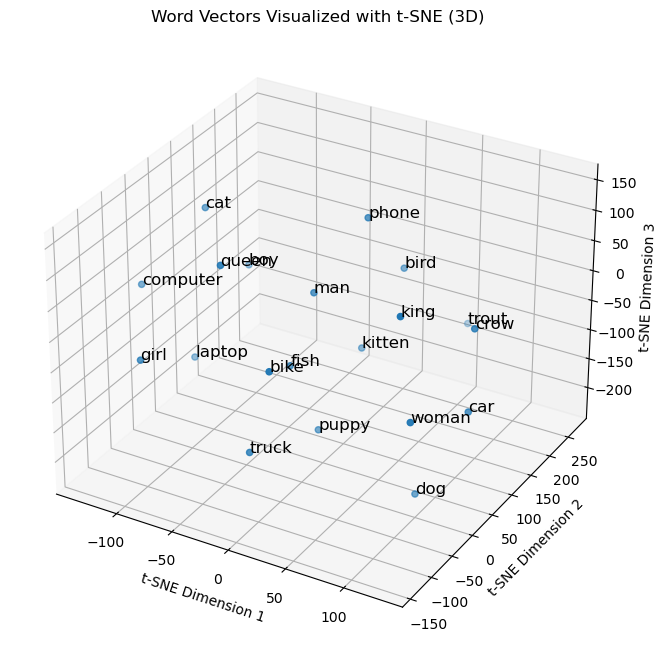

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=3, random_state=42, perplexity=len(words_to_visualize) - 1)
word_vectors_3d = tsne.fit_transform(word_vectors)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(word_vectors_3d[:, 0], word_vectors_3d[:, 1], word_vectors_3d[:, 2])

# Add labels to the points
for i, word in enumerate(words_to_visualize):
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2], word, fontsize=12)

ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.title('Word Vectors Visualized with t-SNE (3D)')
plt.show()

In [14]:
from gensim import downloader as api

# Load the text8 corpus
corpus = api.load('text8')

# Flatten the list of lists into a single list of words
all_words = [word for sentence in corpus for word in sentence]

# Create a set of unique words
unique_words = set(all_words)

# Count the number of unique words
num_unique_words = len(unique_words)

print(f"Number of unique words in the text8 corpus: {num_unique_words}")

Number of unique words in the text8 corpus: 253854
